### Импортируем биьлиотеки

In [53]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split




### Познакомимся с данными


In [54]:
hotels = pd.read_csv('data/hotels.csv')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

### 8 столбцов содержат строковые значения и 9 - числовые. Признаки lat и lng содержат пропущенные значения

In [55]:
### Посмотрим какая информация содержится в столбце hotel_address

In [56]:
hotels.iloc[:]['hotel_address']

0         Stratton Street Mayfair Westminster Borough Lo...
1         130 134 Southampton Row Camden London WC1B 5AF...
2          151 bis Rue de Rennes 6th arr 75006 Paris France
3         216 Avenue Jean Jaures 19th arr 75019 Paris Fr...
4                 Molenwerf 1 1014 AG Amsterdam Netherlands
                                ...                        
386798    9 Knaresborough Place Kensington and Chelsea L...
386799    Landstra er Hauptstra e 155 03 Landstra e 1030...
386800    29 31 Gower Street Camden London WC1E 6HG Unit...
386801    31 Great Cumberland Place Westminster Borough ...
386802    25 Courtfield Gardens Kensington and Chelsea L...
Name: hotel_address, Length: 386803, dtype: object

### Создадим из признака hotel_address признаки country и city


In [57]:
def get_country(arg):
    arg = arg.split(' ')[-1]
    if arg == 'Kingdom':
        return 'United Kingdom'
    else:
        return arg
hotels['country'] = hotels['hotel_address'].apply(get_country)
hotels['country'].value_counts()

United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: country, dtype: int64

In [58]:
def get_city(arg):
    arg = arg.split(' ')[-2]
    if arg == 'United':
        return 'London'
    else:
        return arg
hotels['city'] = hotels['hotel_address'].apply(get_city)
hotels['city'].value_counts()

London       196774
Barcelona     45132
Paris         44830
Amsterdam     43006
Vienna        29178
Milan         27883
Name: city, dtype: int64

### Зная города расположения отелей заполним пропуски координат медианными значениями

In [59]:
hotels = hotels.copy()
coordinates = hotels.groupby(['city'])
coordinates['lat'].median()
coordinates['lng'].median()
hotels['lat'] = coordinates['lat'].apply(lambda x: x.fillna(x.median()))
hotels['lng'] = coordinates['lng'].apply(lambda x: x.fillna(x.median()))
hotels = hotels
hotels.info()

C:\Temp\ipykernel_8044\1720796640.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  hotels['lat'] = coordinates['lat'].apply(lambda x: x.fillna(x.median()))
C:\Temp\ipykernel_8044\1720796640.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  hotels['lng'] = coordinates['lng'].apply(lambda x: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [60]:
### Приведем признак review_date к формату datetime и оставим год и месяц

In [61]:
hotels['review_year'] = pd.to_datetime(hotels['review_date']).dt.year
hotels['review_month'] = pd.to_datetime(hotels['review_date']).dt.month
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,country,city,review_year,review_month
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,United Kingdom,London,2016,2
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,United Kingdom,London,2017,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,France,Paris,2016,10
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,France,Paris,2015,9
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,Netherlands,Amsterdam,2016,3


### Проверим количество уникальных названий отелей

In [62]:
len(hotels['hotel_name'].unique())

1492

In [63]:
# Выделим 50 самых популярных названий отелей
hotel_name_list =(hotels['hotel_name'].value_counts(normalize=True).nlargest(50))
hotels['hotel_name'] = hotels['hotel_name'].apply(lambda x: x.strip() if x in hotel_name_list else 'other') 

In [64]:
len(hotels['reviewer_nationality'].unique())

225

In [65]:
hotels['reviewer_nationality'].value_counts()

 United Kingdom               184033
 United States of America      26541
 Australia                     16239
 Ireland                       11126
 United Arab Emirates           7617
                               ...  
 Cook Islands                      1
 Guinea                            1
 Comoros                           1
 Anguilla                          1
 Grenada                           1
Name: reviewer_nationality, Length: 225, dtype: int64

### Найдем 10 самых популярных тегов и создадим признаки для каждого из них

In [66]:
tag_list = []
for x in hotels['tags']:
    x = x[2:-2]
    x = x.strip().split(' \', \' ')
    for i in x:
        if i not in tag_list:
            tag_list.append(i)
    


from collections import Counter

top_tag_list = Counter(tag_list).most_common(10)

top_tags = []
for l in top_tag_list:
    top_tags.append(l)
      

for tag in top_tags:
    tag_name = str(tag[0])
    hotels[tag_name] =  hotels['tags'].apply(lambda x: 1 if tag_name in x else 0)
    

    

In [67]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

### Преобразуем признак days_since_review , оставим в данных целое число

In [68]:
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: x.split()[0])
hotels['days_since_review'] = hotels['days_since_review'].astype('int')


In [69]:
print(hotels['total_number_of_reviews_reviewer_has_given'].groupby(
    pd.cut(hotels['total_number_of_reviews_reviewer_has_given'], 
           np.arange(0, 360, 25))).agg('count'))

# логарифмируем значение признака, чтобы оставить только информацию 
# о степени (порядке) активности рецензента:
hotels['total_number_of_reviews_reviewer_has_given'] = \
    hotels['total_number_of_reviews_reviewer_has_given'].apply(lambda x: np.log(x+1))

total_number_of_reviews_reviewer_has_given
(0, 25]       366215
(25, 50]       16316
(50, 75]        2953
(75, 100]        864
(100, 125]       218
(125, 150]       107
(150, 175]        87
(175, 200]        16
(200, 225]        11
(225, 250]         8
(250, 275]         2
(275, 300]         2
(300, 325]         2
(325, 350]         1
Name: total_number_of_reviews_reviewer_has_given, dtype: int64


### С помощью бинарного кодирования закодируем признаки hotel_name и reviewer_nationality, перед этим удалив лишние пробелы

In [70]:
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text
    
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(strip)
    

In [71]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder_name = ce.BinaryEncoder(cols=['hotel_name']) # указываем столбец для кодирования
name_bin = bin_encoder_name.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, name_bin], axis=1)
hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,Standard Double Room,Stayed 1 night,Solo traveler,Modern Double Room Echo,hotel_name_0,hotel_name_1,hotel_name_2,hotel_name_3,hotel_name_4,hotel_name_5
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,other,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,0,0,0,0,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,other,United Kingdom,poor breakfast,3,1361,location,...,1,1,0,0,0,0,0,0,0,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,other,China,No kettle in room,6,406,No Positive,...,0,0,1,1,0,0,0,0,0,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,other,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,1,1,0,0,0,0,0,0,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,other,France,No Negative,0,617,Tr s proche du metro Earl s court,...,0,0,0,0,0,0,0,0,0,1
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,other,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,1,0,0,0,0,0,0,0,0,1
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,other,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,0,1,1,0,0,0,0,0,0,1
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,other,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,0,0,1,0,0,0,0,0,0,1


In [72]:
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
nationality_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, nationality_bin], axis=1)
hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,hotel_name_4,hotel_name_5,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,other,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,1,0,0,0,0,0,0,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,other,United Kingdom,poor breakfast,3,1361,location,...,0,1,0,0,0,0,0,0,0,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,other,China,No kettle in room,6,406,No Positive,...,0,1,0,0,0,0,0,0,1,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,other,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,1,0,0,0,0,0,0,0,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,other,France,No Negative,0,617,Tr s proche du metro Earl s court,...,0,1,0,0,0,0,0,1,0,0
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,other,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,0,1,0,0,1,0,1,0,1,1
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,other,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,0,1,0,0,0,0,1,1,1,1
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,other,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,0,1,0,0,0,0,1,0,0,0


### Закодируем порядковым кодированием признаки review_year и review_month

In [73]:
ord_encoder = ce.OrdinalEncoder(cols=['review_year'])
year_col = ord_encoder.fit_transform(hotels['review_year'])
hotels = pd.concat([hotels, year_col], axis=1)

ord_encoder = ce.OrdinalEncoder(cols=['review_month'])
month_col = ord_encoder.fit_transform(hotels['review_month'])
hotels = pd.concat([hotels, year_col], axis=1)

hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,review_year,review_year
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,other,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,0,0,0,1,1,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,other,United Kingdom,poor breakfast,3,1361,location,...,0,0,0,0,0,0,0,1,2,2
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,other,China,No kettle in room,6,406,No Positive,...,0,0,0,0,0,0,1,0,1,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,other,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,0,0,0,0,0,0,1,3,3
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,other,France,No Negative,0,617,Tr s proche du metro Earl s court,...,0,0,0,0,0,1,0,0,2,2
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,other,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,0,0,1,0,1,0,1,1,2,2
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,other,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,0,0,0,0,1,1,1,1,1,1
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,other,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,0,0,0,0,1,0,0,0,2,2


### С помощью однократного кодирования закодируем признаки hotel_name, country и city

In [74]:
hotels_dummies = pd.get_dummies(hotels, columns=['hotel_name', 'country', 'city'])
hotels = pd.concat([hotels, hotels_dummies], axis=1)

### Поработаем с признаками negative_review и positive_review

In [75]:
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: x.replace('No Negative', 'Positive'))
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: x.replace('N A', 'Positive'))
hotels['negative_review'] = hotels['negative_review'].apply(
    lambda x: x.replace('All good', 'Positive'))
hotels['negative_review'] = hotels['negative_review'].apply(
    lambda x: x.replace('No complaints', 'Positive'))
hotels['negative_review'] = hotels['negative_review'].apply(
    lambda x: x.replace('Nothing to dislike', 'Positive'))
hotels['positive_review'] = hotels['positive_review'].apply(
    lambda x: x.replace('No Positive', 'Negative'))

def get_negative(arg):
    if 'Positive' not in arg:
        return 1
    else:
        return 0
    
hotels['negative_review'] =  hotels['negative_review'].apply(get_negative)

def get_positive(arg):
    if 'Negative' not in arg:
        return 1
    else:
        return 0

hotels['positive_review'] = hotels['positive_review'].apply(get_positive)

hotels.head()
    

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,country_Italy,country_Netherlands,country_Spain,country_United Kingdom,city_Amsterdam,city_Barcelona,city_London,city_Milan,city_Paris,city_Vienna
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,other,United Kingdom,1,3,1994,1,...,0,0,0,1,0,0,1,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,other,United Kingdom,1,3,1361,1,...,0,0,0,1,0,0,1,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,other,China,1,6,406,1,...,0,0,0,0,0,0,0,0,1,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,other,United Kingdom,1,0,607,1,...,0,0,0,0,0,0,0,0,1,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,1,4,7586,1,...,0,1,0,0,1,0,0,0,0,0


### Убираем обработанные признаки

In [76]:
hotels.drop(columns = ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality',
                    'tags', 'country', 'city'], inplace = True)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 143 entries, additional_number_of_scoring to city_Vienna
dtypes: float64(10), int32(6), int64(64), uint8(63)
memory usage: 250.5 MB


Наиболее высокая корреляция между признаками:


,level_0,level_1,0
20437,city_Vienna,country_Austria,1.000000
20295,city_Paris,country_France,1.000000
20153,city_Milan,country_Italy,1.000000
20013,city_London,country_United Kingdom,1.000000
19869,city_Barcelona,country_Spain,1.000000
19725,city_Amsterdam,country_Netherlands,1.000000
1765,review_year,days_since_review,0.917355
7781,Leisure trip,Business trip,0.904145
19355,country_Spain,lat,0.844749
19784,city_Barcelona,lat,0.844749


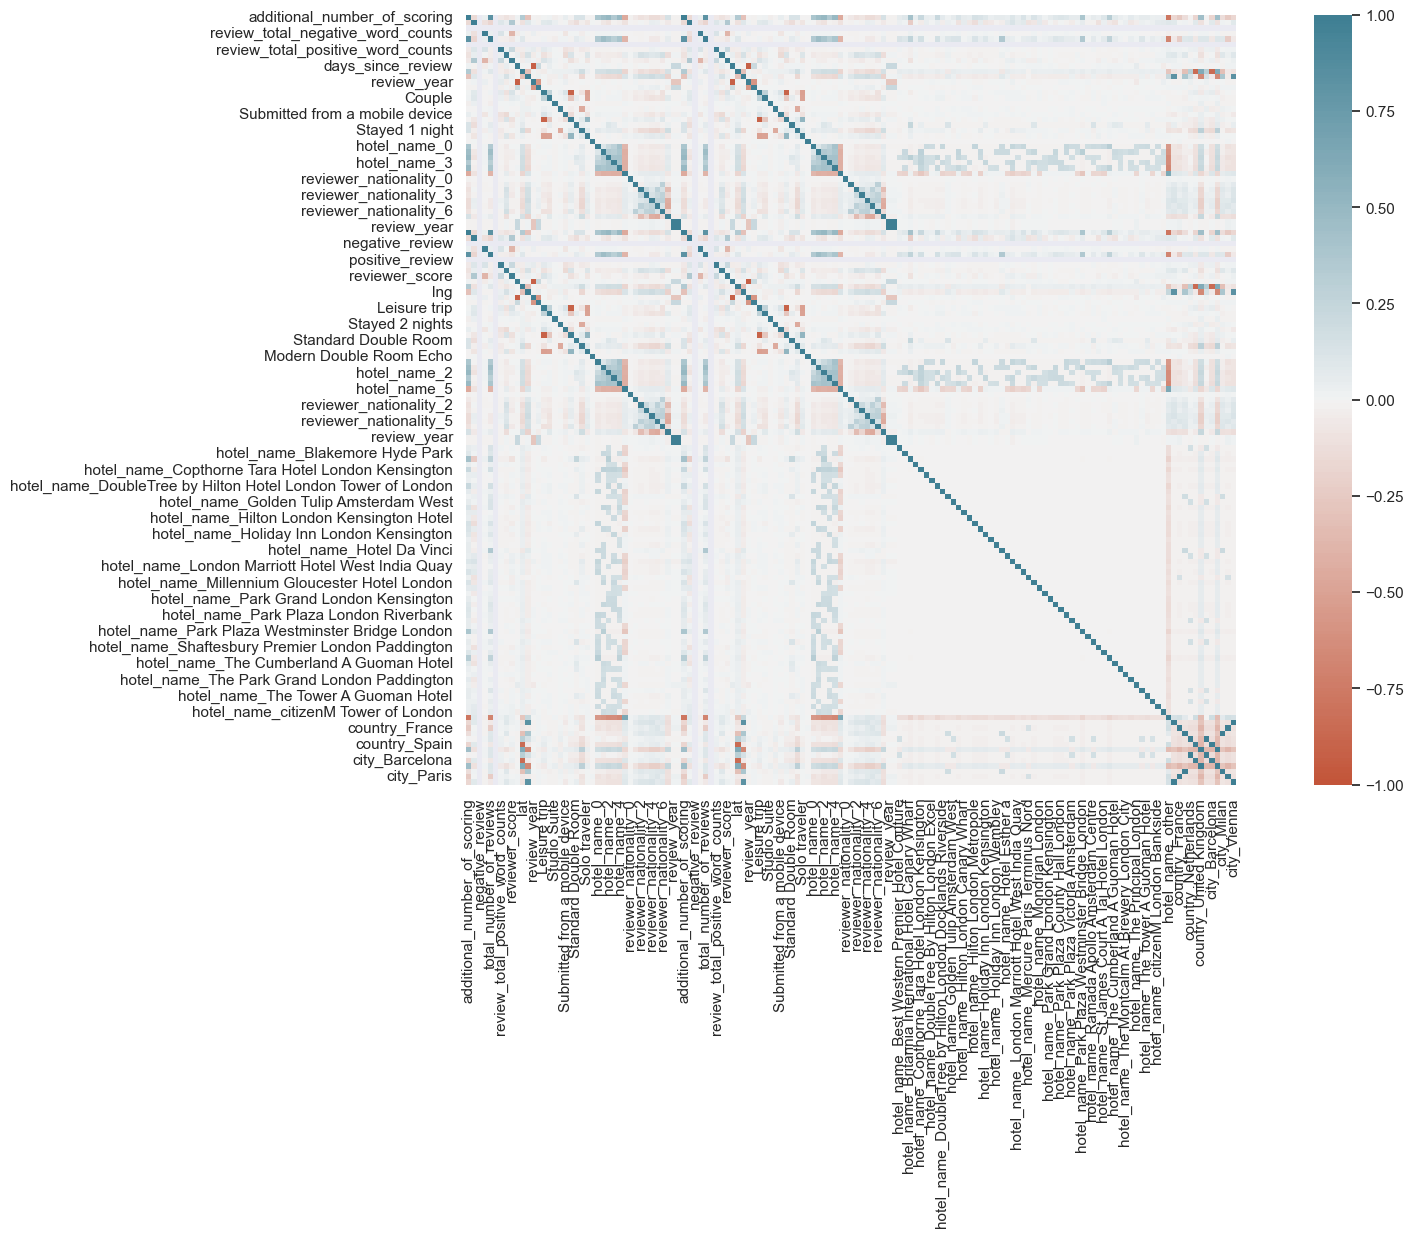

In [77]:
# Построим корреляционную матрицу и проверим данные на мультиколлинеарность
corr = hotels.corr()
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.heatmap(
    corr, 
    vmin=-1, 
    vmax=1, 
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
);
print('Наиболее высокая корреляция между признаками:')
corr_unstack = corr.abs().unstack().reset_index()
corr_unstack = corr_unstack.sort_values(by=[0], ascending=False)
mask = corr_unstack['level_0'] != corr_unstack['level_1']
corr_unstack = corr_unstack[mask]
corr_unstack['pr1'] = corr_unstack['level_0'] + corr_unstack['level_1']
corr_unstack['pr1'] = corr_unstack['pr1'].apply(lambda x: ''.join(sorted(list(x))))
corr_unstack = corr_unstack.drop_duplicates(subset=['pr1'])
corr_unstack = corr_unstack.drop(['pr1'], axis=1)
corr_unstack.iloc[:20, :]

In [78]:
# Удалим признаки с коллинеарностью больше 0,75
hotels.drop(columns = ['country_Austria', 'country_France', 'country_Italy', 'country_United Kingdom',
                     'country_Spain', 'country_Netherlands', 'review_year', 'days_since_review',
                     'lat', 'lng', 'Business trip', 'additional_number_of_scoring'], inplace = True)

In [79]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 121 entries, average_score to city_Vienna
dtypes: float64(6), int64(58), uint8(57)
memory usage: 209.9 MB


In [80]:
# Уберем оставшмеся необработанные признаки типа object
object_columns = [s for s in hotels.columns if hotels[s].dtypes.name == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)



In [81]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [82]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [83]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [87]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13610245822811456


Небольшой бонус:


In [86]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)